In [1]:
import perf
import pathlib
import pandas
import altair

In [19]:
def get_items():
    for path in pathlib.Path('.').glob("*.json"):
        _, _, *parts = path.stem.split('-', 3)
        is_reduced = parts[0] == 'reduced'
        label = parts[1] if len(parts) == 2 else 'inner'
        benchmark = perf.Benchmark.load(str(path))
        n = int(benchmark.get_name())
        for value in benchmark.get_values():
            yield {"label": label, "n": n, "time": value, "reduced": is_reduced}


In [20]:
df = pandas.DataFrame(get_items())
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 4 columns):
label      3600 non-null object
n          3600 non-null int64
reduced    3600 non-null bool
time       3600 non-null float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 88.0+ KB


,label,n,reduced,time
0,tensordot,10,True,0.000026
1,tensordot,10,True,0.000026
2,tensordot,10,True,0.000026
3,tensordot,10,True,0.000026
4,tensordot,10,True,0.000026


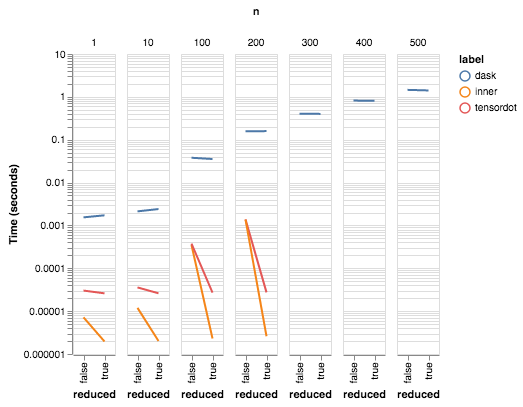

In [59]:
points = altair.Chart(df).mark_line().encode(
    altair.Y(
        'mean(time)',
        scale=altair.Scale(type='log', zero=False),
        axis=altair.Axis(title='Time (seconds)'),
    ),
    x='reduced',
    column='n',
    color='label'
)


points